# U.S. Medical Insurance Costs

In [96]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
sex = df["sex"]
age = df["age"]
bmi = df["bmi"]
children = df["children"]
smoker = df["smoker"]
region = df["region"]
charges = df["charges"]


 vizualizace počtu můžu a žen v souboru
 vizualization number of male and females in dataframe

In [6]:
def sex_count(sex):
    male_count = 0
    female_count = 0
    for x in sex:
        if x == "male":
            male_count += 1
        elif x == "female":
            female_count += 1
    return female_count, male_count

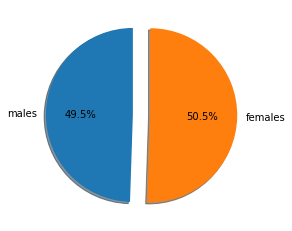

In [29]:
plt.pie(sex_count(sex), explode = [0.1, 0.1], labels = ["males", "females"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


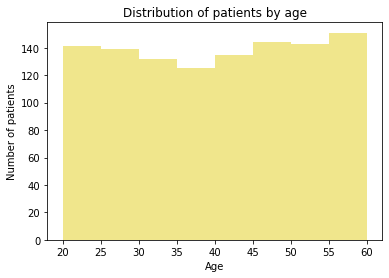

In [36]:
plt.hist(age, bins = 8, range = (20,60), color = "khaki", linewidth = 0.5)
plt.title("Distribution of patients by age")
plt.xlabel("Age")
plt.ylabel("Number of patients");

In [34]:
df_males = df[df["sex"] == "male"]

In [7]:
def age_men(df):
    df_males = df[df["sex"] == "male"]
    age = df_males["age"]
    
    plt.hist(age, bins = 8, range = (20,60))
    plt.title("Distribution of males by age")
    plt.xlabel("Age")
    plt.ylabel("Number of male-patients");

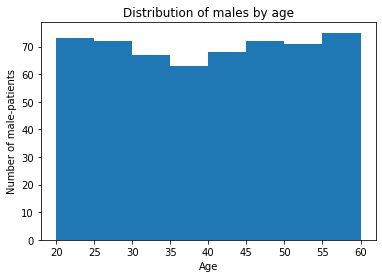

In [8]:
age_men(df)

In [13]:
df_females = df[df["sex"] == "female"]

In [15]:
def age_women(df):
    df_females = df[df["sex"] == "female"]
    age = df_females["age"]
    
    plt.hist(age, bins = 8, range = (20,60))
    plt.title("Distribution of females by age")
    plt.xlabel("Age")
    plt.ylabel("Number of female-patients");

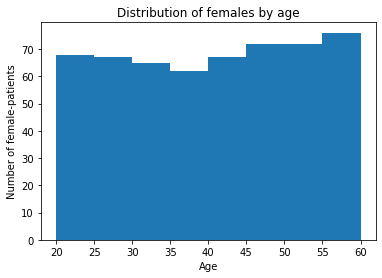

In [58]:
age_women(df)

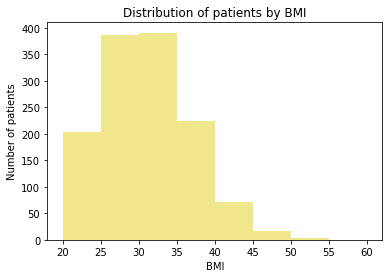

In [19]:
plt.hist(bmi, bins = 8, range = (20,60), color = "khaki")
plt.title("Distribution of patients by BMI")
plt.xlabel("BMI")
plt.ylabel("Number of patients");

In [57]:
def men_bmi(df):
    df_males = df[df["sex"] == "male"]
    bmi = df_males["bmi"]
    
    plt.hist(bmi, bins = 8, range = (15,55))
    plt.title("Distribution of males by BMI")
    plt.xlabel("BMI")
    plt.ylabel("Number of female-patients");
    

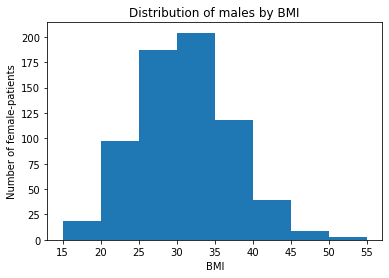

In [59]:
men_bmi(df)

In [60]:
def women_bmi(df):
    df_females = df[df["sex"] == "female"]
    bmi = df_females["bmi"]
    
    plt.hist(bmi, bins = 8, range = (15,55))
    plt.title("Distribution of females by age")
    plt.xlabel("BMI")
    plt.ylabel("Number of female-patients");

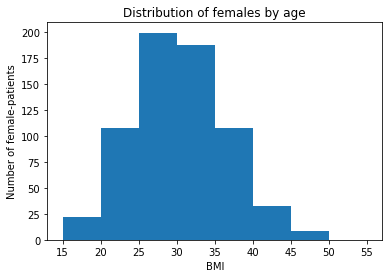

In [61]:
women_bmi(df)

In [91]:
df_new = df

In [100]:
# northwest = 1, norteast = 2, southwest = 3, southeast = 4
regions = [1, 2, 3, 4]
conditions = [df["region"] == "northwest", df["region"] == "northeast", df["region"] == "southwest", df["region"] == "southeast"]
df["num_of_regions"] = np.select(conditions, regions)
    

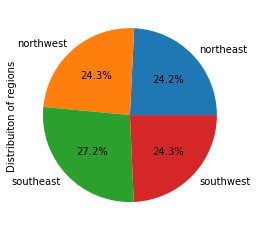

In [120]:
df.region.str.get_dummies(sep = ",").sum().plot.pie(label = "Distribuiton of regions", autopct='%1.1f%%');

In [191]:
def average_cost_of_smoker(df):
    df_smoker = df[df["smoker"] == "yes"]
    smoker_1 = df_smoker["smoker"]
    charges_1 = df_smoker["charges"]
    
    cost = 0
    for x in charges_1:
        cost += x
        
    smoker_average = (cost/len(smoker_1))
        
    df_non_smoker = df[df["smoker"] == "no"]
    smoker_2 = df_non_smoker["smoker"]
    charges_2 = df_non_smoker["charges"]
    
    cost_1 = 0
    for z in charges_2:
        cost_1 += z
        
    non_smoker_average = (cost_1/len(smoker_2))
    
    plt.bar(("smoker", "non smoker"), (smoker_average, non_smoker_average))
    plt.title("Comparsion of average price between smoker and non-smoker")
    

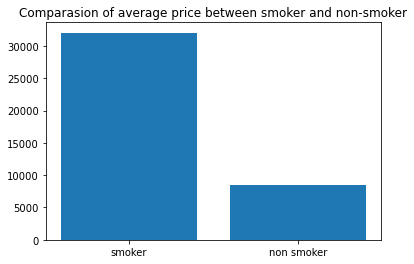

In [192]:
average_cost_of_smoker(df);